In [81]:
!pip install imageio

You should consider upgrading via the 'c:\osgeo4w64\bin\python3.exe -m pip install --upgrade pip' command.


In [31]:
import pandas as pd
from PIL import Image
import imageio
import glob
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%pwd

'c:\\Users\\salik\\Documents\\GitHub\\Brain-Tumor-Detection\\EDA'

In [3]:
path = 'c:/Users/salik/Documents/GitHub/Brain-Tumor-Detection/Data/'

In [4]:
df = pd.DataFrame()

In [5]:
for filename in glob.glob(path+'yes/*.jpg'):
    im = imageio.imread(filename)
    x,y = im.shape[0],im.shape[1]
    min = im.min()
    max = im.max()
    df = df.append([[im,"Tumorous",x,y,min,max]])
for filename in glob.glob(path+'no/*.jpg'):
    im = imageio.imread(filename)
    x,y = im.shape[0],im.shape[1]
    min = im.min()
    max = im.max()
    df = df.append([[im,"Non-Tumorous",x,y,min,max]])

In [6]:
df = df.rename({0:'Img',1:'Type',2:'X',3:'Y',4:'Min',5:'Max'},axis = 1)
df.head()

,Img,Type,X,Y,Min,Max
0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Tumorous,348,287,0,255
0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Tumorous,630,587,0,255
0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Tumorous,879,766,0,255
0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Tumorous,630,630,0,255
0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Tumorous,336,264,0,255


In [7]:
df.count()

Img     3000
Type    3000
X       3000
Y       3000
Min     3000
Max     3000
dtype: int64

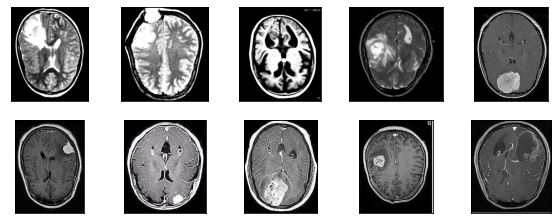

In [8]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(df.Img.iloc[i], cmap=plt.cm.binary)
plt.show()

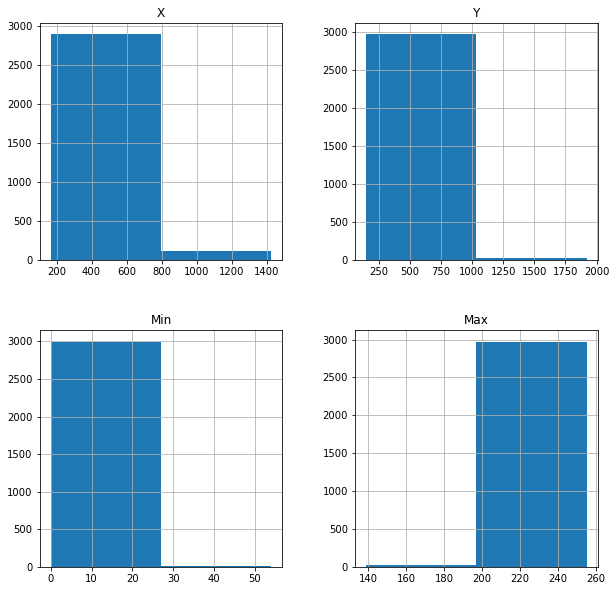

In [93]:
df1 = df[['X','Y','Min','Max']]
hist = df1.hist(bins=2,figsize = (10,10))

In [26]:
df1a = df[['X','Y','Min','Max','Type']]

In [32]:
df1a['color'] = np.where(df1a['Type']=='Tumorous', 'red', 'green')

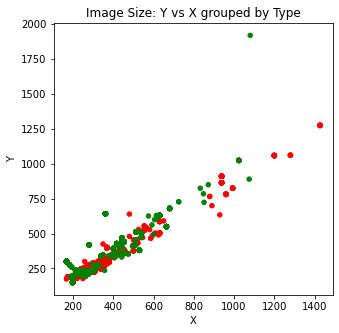

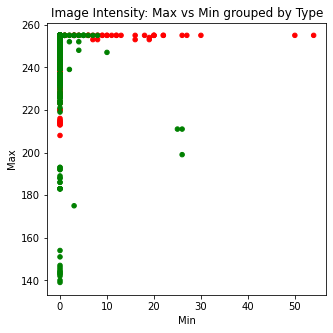

In [110]:
df1a.plot.scatter(x = 'X',y='Y',c ='color',title = 'Image Size: Y vs X grouped by Type',figsize = (5,5))

df1a.plot.scatter(x = 'Min',y='Max',c ='color',title = 'Image Intensity: Max vs Min grouped by Type',figsize = (5,5))

In [100]:
aa =df1a.groupby('Type').agg(['min', 'max', 'mean','median','std']).reset_index()
aa = aa.set_index('Type')
display(aa)

X                                         Y                    \
              min   max        mean median         std  min   max        mean   
Type                                                                            
Non-Tumorous  168  1080  306.702667    238  141.918226  150  1920  299.980667   
Tumorous      167  1427  398.853333    342  206.095229  175  1275  350.455333   

                                Min                                 Max       \
             median         std min max      mean median       std  min  max   
Type                                                                           
Non-Tumorous    227  148.211275   0  26  0.111333      0  1.272275  139  255   
Tumorous        283  193.916053   0  54  0.366000      0  2.907062  208  255   

                                            
                    mean median        std  
Type                                        
Non-Tumorous  252.033333    255  12.917151  
Tumorous      253.938000    255   5.188330

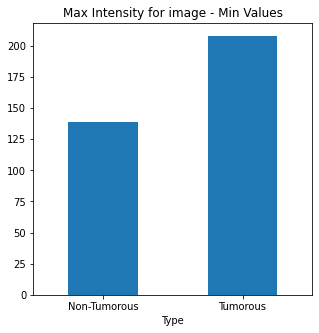

In [112]:
aa['Max','min'].plot(kind = 'bar',rot = 0,title = 'Max Intensity for image - Min Values',figsize = (5,5))

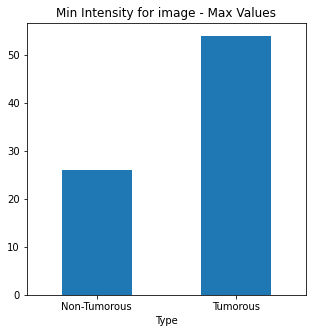

In [113]:
aa['Min','max'].plot(kind = 'bar',rot = 0,title = 'Min Intensity for image - Max Values',figsize = (5,5))